In [1]:
from datetime import datetime

import pandas as pd
from energy_box_control.power_hub.control import control_power_hub, initial_control_state
from energy_box_control.power_hub.network import PowerHub, PowerHubSchedules
from energy_box_control.schedules import ConstSchedule

import matplotlib.pylab as plt

%load_ext autoreload 
%autoreload 2

In [2]:

from datetime import timedelta
from energy_box_control.power_hub.control import initial_control_all_off


results = {} 
control_results = {}

schedules = PowerHubSchedules(global_irradiance_schedule=ConstSchedule(800), cooling_demand_schedule = ConstSchedule(100/24/60/60))
power_hub = PowerHub.power_hub(schedules)
steps = 500

control_state = initial_control_state()

state = power_hub.simple_initial_state(datetime.now(), timedelta(seconds = 60))
control_values = initial_control_all_off(power_hub)
power_hub_sensors = power_hub.sensors_from_state(state)

for _ in range(steps):
    state = power_hub.simulate(state, control_values)
    sensors = power_hub.sensors_from_state(state)
    control_state, control_values = control_power_hub(power_hub, control_state, sensors, state.time)
    #control_values = no_control(power_hub)

    control_results[state.time.timestamp] =  pd.DataFrame({key: item.__dict__ for key, item in control_values.name_to_control_values_mapping(power_hub).items()}).T.stack()
    results[state.time.timestamp] = pd.DataFrame(sensors.to_dict()).T.stack()

control_data = pd.DataFrame(control_results).T[1::]
data = pd.DataFrame(results).T[1::]


In [3]:
# make list of relevant sensor variables

# make to_dict for control state (add control mode)

#solve weird starting value for control case 

#test powers sum to 0 

#test consistency of flows 




In [4]:
appliances = ["heat_pipes", "hot_reservoir", "pcm", "yazaki", "chiller", "preheat_reservoir", "outboard_exchange"]
temperatures = [(appliance,var) for appliance, var in data.columns if 'temperature' in var and appliance in appliances]
powers = [(appliance,var) for appliance, var in data.columns if 'power' in var and appliance in appliances]
flows = [(appliance,var) for appliance, var in data.columns if 'flow' in var and appliance in appliances]

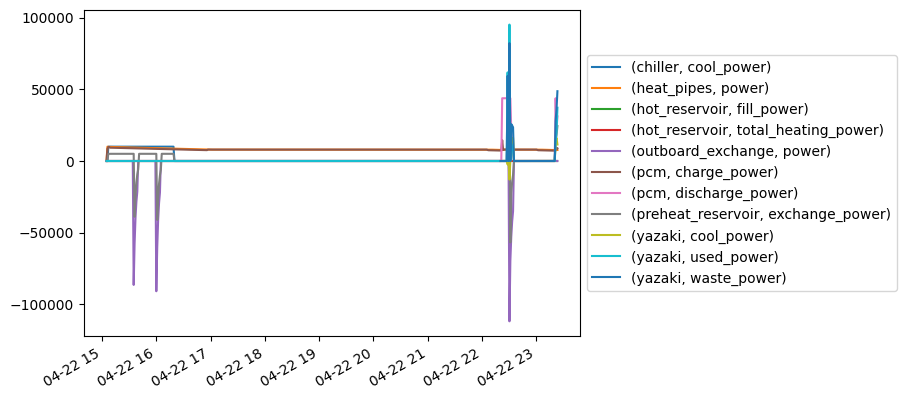

In [5]:
data[powers].plot()
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

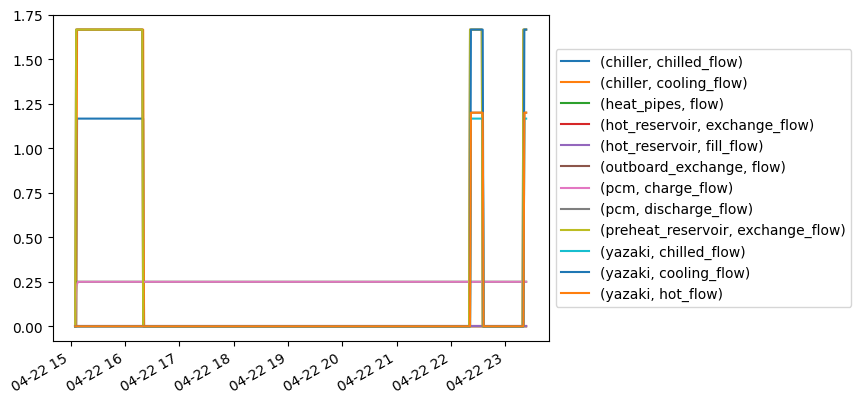

In [6]:
data[flows].plot()
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))